## Getting started

In [1]:
!pip install ipywidgets 
# To enable `ipywidgets`
!jupyter nbextension enable --py widgetsnbextension

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Enabling notebook extension jupyter-js-widgets/extension...
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json
      - Validating: OK
Paths used for configuration of notebook: 
    	/root/.jupyter/nbconfig/notebook.json


In [2]:
import pandas as pd
from ipywidgets import widgets
from IPython.display import display

##Sliders

In [3]:
from IPython.display import display
slider = widgets.IntSlider()
display(slider)

IntSlider(value=0)

##Button

In [4]:
btn = widgets.Button(description='Widget')
def button_eventhandler(obj):
    print('Hello from the {} button!'.format(obj.description))
btn.on_click(button_eventhandler)
display(btn)

Button(description='Widget', style=ButtonStyle())

Hello from the Widget button!
Hello from the Widget button!
Hello from the Widget button!
Hello from the Widget button!


##Dropdown 

In [5]:
import pandas as pd
url="https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)

In [6]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dropdown = widgets.Dropdown(options =["None", "DF head", "DF info"])
output = widgets.Output()
def select(change):
  output.clear_output()
  if(change.new == 'None'):
    with output:
      display("Select an option")
  elif(change.new == 'DF head'):
    with output:
      display(df.head())
  elif(change.new == 'DF info'):
    with output:
      display(df.info())
  else:
    with output:
      display("Error: option not found")
  
dropdown.observe(select, names="value")
display(dropdown)
display(output)

Dropdown(options=('None', 'DF head', 'DF info'), value='None')

Output()

##Text field

In [8]:
text = widgets.Text(description="Text - ")
out = widgets.Output()
def select(change):
    out.clear_output()
    with out:
      display("Entered value - "+change.new)
  
text.observe(select, names="value")
display(text)
display(out)

Text(value='', description='Text - ')

Output()

##HBox and VBox

In [9]:
texth = widgets.Text(description="Text - ")
outh = widgets.Output()
def select(change):
    outh.clear_output()
    with outh:
      display("Entered value - "+change.new)
  
texth.observe(select, names="value")

hbox = widgets.HBox([texth, outh])
display(hbox)

In [10]:
text = widgets.Text(description="Text - ")
out = widgets.Output()
def select(change):
    out.clear_output()
    with out:
      display("Entered value - "+change.new)
  
text.observe(select, names="value")

vbox = widgets.VBox([text, out])
display(vbox)

##Dashboard( Mini Panda's profiler)

In [11]:
#################-- DataFrame Head --#################
output_df_head = widgets.Output()
output_df_head.clear_output()
with output_df_head:
    print(df.head())

#################-- DataFrame Info --#################
output_df_info = widgets.Output()
output_df_info.clear_output()
with output_df_info:
    print(df.info())

#########-- Unique values in chosen column --#########
dropdown_columns = widgets.Dropdown(options = df.columns, description = "Column - ")
output_df_unique = widgets.Output()

def dropdown_columns_eventhandler(change):
  output_df_unique.clear_output()
  ot = df[change.new].unique()
  with output_df_unique:
    display(ot)

dropdown_columns.observe(dropdown_columns_eventhandler, names='value')
dashboard_unique = widgets.VBox([dropdown_columns, output_df_unique])

#########-- Graph b/w two different columns --########
output_df_graph = widgets.Output()
dropdown_c1 = widgets.Dropdown(options = df.columns, description = "Column x - ")
dropdown_c2 = widgets.Dropdown(options = df.columns, description = "Column y - ")

def common(x='PassengerId', y = 'Pclass'):
  output_df_graph.clear_output()
  df.plot(x=x, y=y, style='o')
  # with output_df_graph:
  #   display(gf)

def dropdown_c1_eventhandler(change):
    common(change.new, dropdown_c2.value)
def dropdown_c2_eventhandler(change):
    common(dropdown_c1.value, change.new)

dropdown_c1.observe(dropdown_c1_eventhandler, names='value')
dropdown_c2.observe(dropdown_c2_eventhandler, names='value')
columns_hbox = widgets.HBox([dropdown_c1, dropdown_c2])
dashboard_graph = widgets.VBox([columns_hbox, output_df_graph])

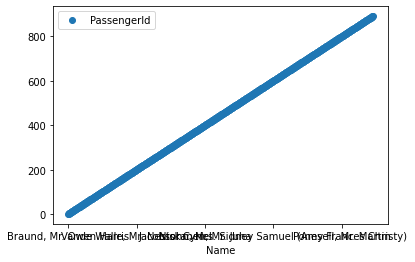

TypeError: ignored

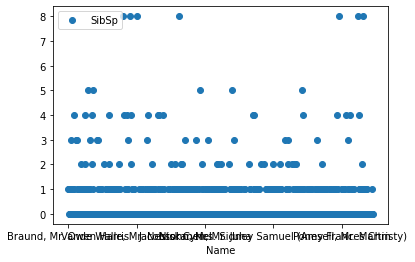

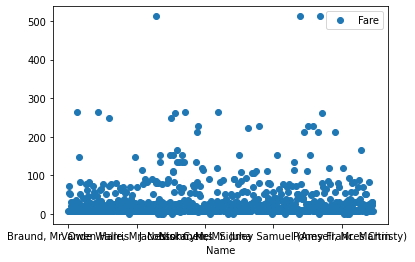

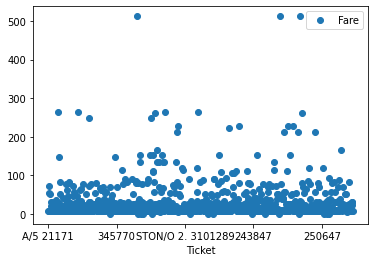

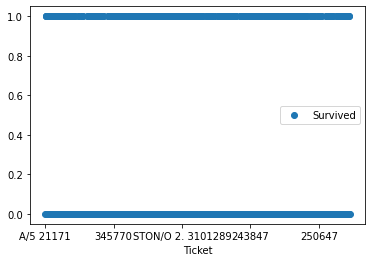

In [12]:
tab = widgets.Tab([output_df_head, output_df_info, dashboard_unique, dashboard_graph])
tab.set_title(0, 'DataFram Head')
tab.set_title(1, 'DataFram Info')
tab.set_title(2, 'Unique values in column')
tab.set_title(3, 'Graph: Column vs column')
display(tab)

### Author
Mohammad Ahmad (Research engineer intern)  
LinkedIn - https://www.linkedin.com/in/mohammad-ahmad-ai/  
Personal Blog - https://code-ml.com/  
GitHub - https://github.com/ahmadkhan242  
Twitter - https://twitter.com/ahmadkhan_242  